In [73]:
# impots 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [74]:
df = pd.read_csv('heart.csv')
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [75]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [77]:
healthy = df[(df['target'] == 0)].count()[1]
sick = df[(df['target'] ==1) ].count()[1]
print ("num of pepole without heart deacise: "+ str(healthy))
print ("num of pepole with chance for heart deacise: "+ str(sick))

num of pepole without heart deacise: 138
num of pepole with chance for heart deacise: 165


In [78]:
# we will nurmaize the data and split it to test and train.
# we choose to splite 30-70 because we have a small data set and we want to have enught validetionn examples.
# split data table into data X and class labels y

X = df.iloc[:,0:13].values
y = df.iloc[:,13].values

#nurmalize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
dfNorm = pd.DataFrame(X_std, index=df.index, columns=df.columns[0:13])
# # add non-feature target column to dataframe
dfNorm['target'] = df['target']
dfNorm.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1
5,0.290464,0.681005,-0.938515,0.478391,-1.048678,-0.417635,0.898962,-0.072018,-0.696631,-0.551783,-0.649113,-0.714429,-2.148873,1
6,0.180175,-1.468418,0.032031,0.478391,0.922521,-0.417635,-1.005832,0.146634,-0.696631,0.224643,-0.649113,-0.714429,-0.512922,1
7,-1.143291,0.681005,0.032031,-0.663867,0.323431,-0.417635,0.898962,1.021244,-0.696631,-0.896862,0.976352,-0.714429,1.123029,1
8,-0.260980,0.681005,1.002577,2.306004,-0.913400,2.394438,0.898962,0.540209,-0.696631,-0.465514,0.976352,-0.714429,1.123029,1
9,0.290464,0.681005,1.002577,1.049520,-1.512490,-0.417635,0.898962,1.064975,-0.696631,0.483451,0.976352,-0.714429,-0.512922,1


In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

X_train.shape, y_train.shape, X_test.shape , y_test.shape

((212, 13), (212,), (91, 13), (91,))

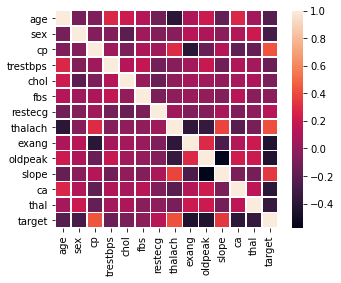

In [80]:
# # calculate the correlation matrix
corr = dfNorm.corr()

# plot the heatmap
fig = plt.figure(figsize=(5,4))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            linewidths=.75)

### Helping Functions

In [81]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
def sfs_features(algo_namem,features_nums):
    sfs_name=SFS(algo_namem, 
                k_features=features_nums, 
                forward=True, 
                floating=False,
                scoring='accuracy',
                cv=5)
    return sfs_name

In [82]:
results_test = {}
results_train = {}
list_algos=[]

In [83]:
def prdict_data(algo_name,X_train,y_train,X_test,y_test,atype='',verbose=0):
    algo_name.fit(X_train, y_train)
    Y_pred = algo_name.predict(X_test)
    acc_train = round(algo_name.score(X_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(X_test, y_test) * 100, 2)
    
    results_test[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_train
    list_algos.append(str(algo_name)[0:str(algo_name).find('(')])
    if verbose ==0:
        print("acc train: " + str(acc_train))
        print("acc test: "+ str(acc_val))
    else:
        return Y_pred

In [84]:
def print_fitures(sfs_name='sfs1',verbose=0):
    a= (sfs_name.k_feature_idx_[0],sfs_name.k_feature_idx_[1],sfs_name.k_feature_idx_[2])
    if verbose ==0:
        print('Selected features:', sfs_name.k_feature_idx_)
        for i in range (len (sfs_name.k_feature_idx_)):
            print (df.iloc[:,sfs_name.k_feature_idx_[i]].name)
    return a

In [85]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

def roc_graph_cv(algo_name,X,y,cvn=5):
    # Run classifier with cross-validation and plot ROC curves
    cv = StratifiedKFold(n_splits=cvn)
    classifier =algo_name

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    i = 0
    for train, test in cv.split(X, y):
        probas_ = classifier.fit(X[train], y[train].ravel()).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test].ravel(), probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [86]:
### helping function

def conf(algo_name,X_test, y_test):
    y_pred = algo_name.predict(X_test)
    forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
    sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.title(str(algo_name)[0:str(algo_name).find('(')])

### PCA
Principal component analysis (PCA) is a technique used to emphasize variation and bring out strong patterns in a dataset.
we use it first make data easy to explore and visualize.

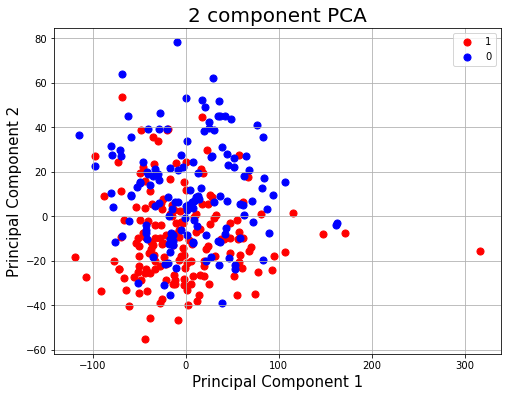

In [87]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,0]
colors = ['r',  'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


### Define The Algorithems
first we will run each algorithem on all the features
then we will use SFS to compere and cheack improvment. we will use sfs to take aoutimaticly from 1 to 5 features as the algorithem subjects

In [88]:
### LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
prdict_data(lda,X_train,y_train,X_test,y_test)

acc train: 85.38
acc test: 80.22


In [89]:
#predictusing sfs:
sfs_1=sfs_features(lda,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = print_fitures(sfs_1)

X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)
print ('\n')
prdict_data(lda,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')

Selected features: (2, 7, 9, 11, 12)
cp
thalach
oldpeak
ca
thal


acc train: 83.96
acc test: 82.42


              precision    recall  f1-score   support

           0       0.89      0.73      0.80        44
           1       0.78      0.91      0.84        47

    accuracy                           0.82        91
   macro avg       0.84      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


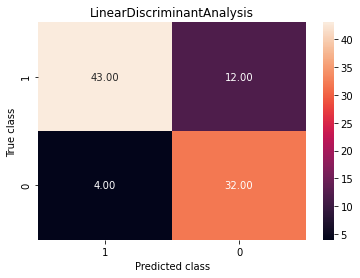

In [90]:
print(classification_report(y_test, lda.predict(X_test_sfs)))
conf(lda,X_test_sfs, y_test)

C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


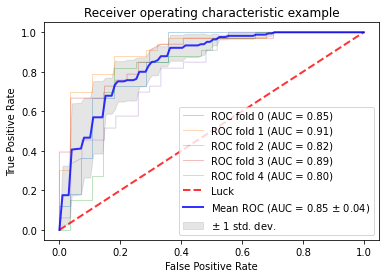

In [91]:
roc_graph_cv(lda,X[:,selectedFeatures],y)

### Random Forest

In [92]:
### RANDOM FOREST
# Train: Random Forest
random_forest = RandomForestClassifier(n_estimators=50, random_state = 0)
prdict_data(random_forest,X_train,y_train,X_test,y_test)

acc train: 100.0
acc test: 84.62


In [93]:
feature_importance = random_forest.feature_importances_
feature_importance

array([0.08201247, 0.04183665, 0.11337517, 0.06745467, 0.08065628,
       0.01412118, 0.01399132, 0.11193405, 0.06173347, 0.12421325,
       0.05381658, 0.10987102, 0.12498388])

In [94]:
feat_importances = pd.Series(random_forest.feature_importances_, index=df.columns[:-1])
feat_importances

age         0.082012
sex         0.041837
cp          0.113375
trestbps    0.067455
chol        0.080656
fbs         0.014121
restecg     0.013991
thalach     0.111934
exang       0.061733
oldpeak     0.124213
slope       0.053817
ca          0.109871
thal        0.124984
dtype: float64

In [95]:
feat_importances = feat_importances.nlargest(13)
feat_importances

thal        0.124984
oldpeak     0.124213
cp          0.113375
thalach     0.111934
ca          0.109871
age         0.082012
chol        0.080656
trestbps    0.067455
exang       0.061733
slope       0.053817
sex         0.041837
fbs         0.014121
restecg     0.013991
dtype: float64

In [96]:
feature = df.columns.values.tolist()[0:-1]
feature

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [97]:
importance = sorted(random_forest.feature_importances_.tolist())
importance

[0.013991318565164047,
 0.014121180929322276,
 0.04183664778709371,
 0.053816582521692205,
 0.06173346766782514,
 0.06745467403688564,
 0.08065627987537724,
 0.08201247225364769,
 0.10987102342046735,
 0.11193404850735242,
 0.11337516833940374,
 0.12421325319550057,
 0.12498388290026796]

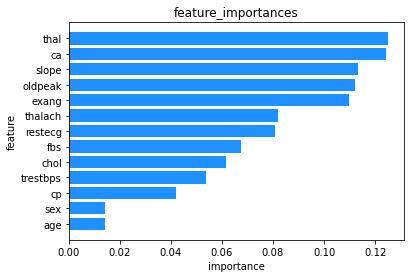

In [98]:
x_pos = [i for i, _ in enumerate(feature)]

plt.barh(x_pos, importance , color='dodgerblue')
plt.ylabel("feature")
plt.xlabel("importance")
plt.title("feature_importances")

plt.yticks(x_pos, feature)

plt.show()

In [99]:
#taking the best 5 features give as smaller result.
currlist =[2,12,10,9,11]
# print (currlist)

random_forest = RandomForestClassifier(n_estimators=100, random_state = 0)
prdict_data(random_forest,X_train[:,currlist],y_train,X_test[:,currlist],y_test,'FS')

acc train: 95.28
acc test: 83.52


In [100]:
sfs_1=sfs_features(random_forest,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = print_fitures(sfs_1)


X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)

print ("\n")
prdict_data(random_forest,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')

Selected features: (2, 11, 12)
cp
ca
thal


acc train: 86.32
acc test: 82.42


              precision    recall  f1-score   support

           0       0.87      0.75      0.80        44
           1       0.79      0.89      0.84        47

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


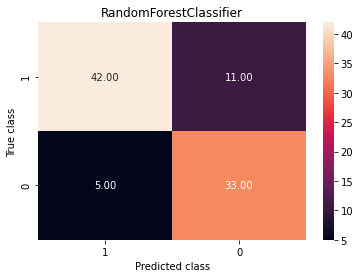

In [101]:
print(classification_report(y_test, random_forest.predict(X_test_sfs)))
conf(random_forest,X_test_sfs, y_test)

C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


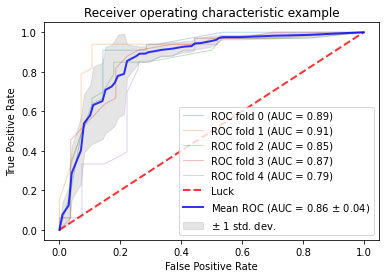

In [102]:
roc_graph_cv(random_forest,X[:,selectedFeatures],y)

### Decision Tree

In [103]:
### DECISION TREE
#  descion tree
dect = tree.DecisionTreeClassifier()

prdict_data(dect,X_train,y_train,X_test,y_test)

acc train: 100.0
acc test: 72.53


In [104]:
sfs_1=sfs_features(dect,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = print_fitures(sfs_1)

X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)

prdict_data(dect,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')

Selected features: (8, 11, 12)
exang
ca
thal
acc train: 86.79
acc test: 78.02


              precision    recall  f1-score   support

           0       0.85      0.66      0.74        44
           1       0.74      0.89      0.81        47

    accuracy                           0.78        91
   macro avg       0.79      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91



C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


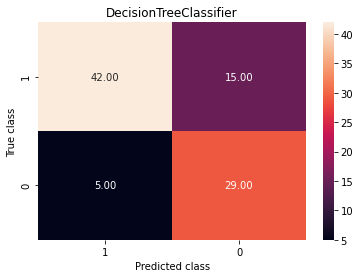

In [105]:
print(classification_report(y_test, dect.predict(X_test_sfs)))
conf(dect,X_test_sfs, y_test)

C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


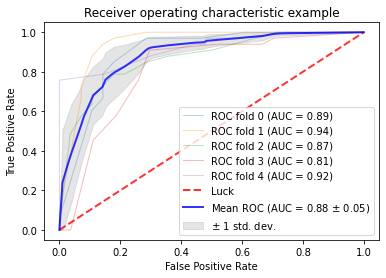

In [106]:
roc_graph_cv(dect,X[:,selectedFeatures],y)

In [107]:
# Gradient Boosting
# Train: Gradient Boosting
gbc = GradientBoostingClassifier(loss='exponential', learning_rate=0.03, n_estimators=75 , max_depth=6)
prdict_data(gbc,X_train,y_train,X_test,y_test)

acc train: 100.0
acc test: 81.32


In [108]:
sfs_1=sfs_features(gbc,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = print_fitures(sfs_1)


X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)

print ("\n")
prdict_data(gbc,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')

Selected features: (8, 11, 12)
exang
ca
thal


acc train: 86.79
acc test: 78.02


              precision    recall  f1-score   support

           0       0.85      0.66      0.74        44
           1       0.74      0.89      0.81        47

    accuracy                           0.78        91
   macro avg       0.79      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91



C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


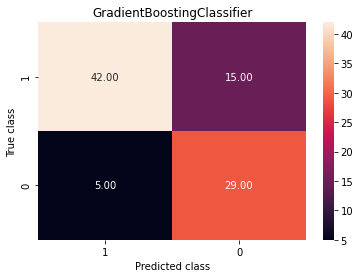

In [109]:
print(classification_report(y_test, gbc.predict(X_test_sfs)))
conf(gbc,X_test_sfs, y_test)

C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


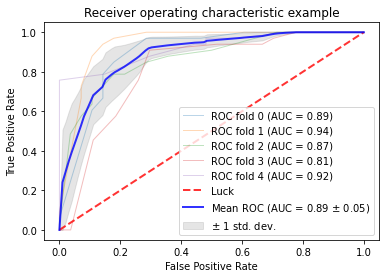

In [110]:
roc_graph_cv(gbc,X[:,selectedFeatures],y)

The optimal number of neighbors is 20 with 60.0%


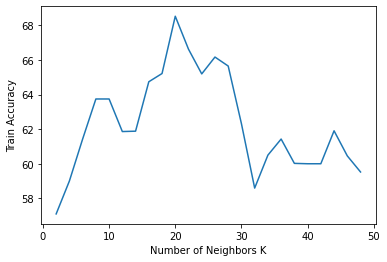

In [111]:
#### KNN 
##to choose the right K we build a loop witch examen all the posible values for K.

from sklearn import model_selection

#Neighbors

neighbors = [x for x in range(1,50) if x%2==0]

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
seed = 123
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
    
    cv_scores.append(scores.mean()*100)
    #print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print(( "The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k])))
    
plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

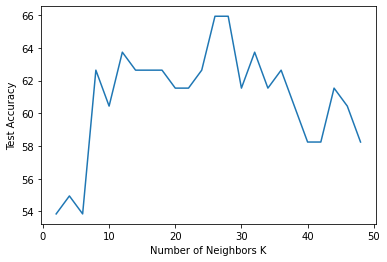

In [138]:
cv_preds = []

#Perform 10-fold cross validation on testing set for odd values of k
seed=123
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    preds = model_selection.cross_val_predict(knn, X_test, y_test, cv=kfold)
    cv_preds.append(metrics.accuracy_score(y_test, preds)*100)
    #print("k=%d %0.2f" % (k_value, 100*metrics.accuracy_score(test_y, preds)))
    #print(cv_preds.index)
    #print(neighbors[cv_preds.index(max(cv_preds))])
optimal_k = neighbors[cv_preds.index(max(cv_preds))]
#print(neighbors)

#print("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_preds[optimal_k]))

plt.plot(neighbors, cv_preds)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Test Accuracy')
plt.show()

### KNN

In [143]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 6)
prdict_data(knn,X_train,y_train,X_test,y_test)

acc train: 74.06
acc test: 68.13


Selected features: (1, 8, 10, 11, 12)
sex
exang
slope
ca
thal
acc train: 87.26
acc test: 76.92
              precision    recall  f1-score   support

           0       0.78      0.73      0.75        44
           1       0.76      0.81      0.78        47

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


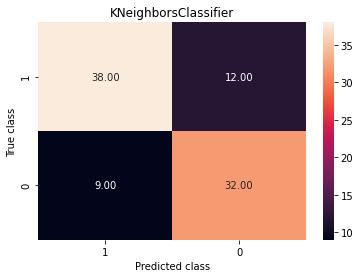

In [145]:
sfs_1=sfs_features(knn,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = print_fitures(sfs_1)

X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)

prdict_data(knn,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')
print(classification_report(y_test, knn.predict(X_test_sfs)))
conf(knn,X_test_sfs, y_test)

C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


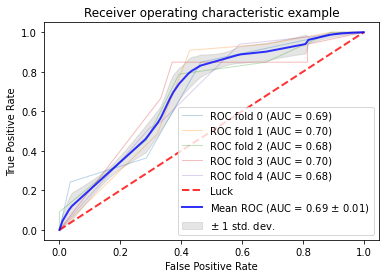

In [146]:
roc_graph_cv(knn,X[:,selectedFeatures],y)

### SVM 

In [147]:
svm = SVC(kernel='linear', probability=True)
prdict_data(svm,X_train,y_train,X_test,y_test,'linear')

acc train: 85.38
acc test: 81.32


In [152]:
svm = SVC(kernel='poly', probability=True)
prdict_data(svm,X_train,y_train,X_test,y_test,'poly')

acc train: 67.92
acc test: 65.93


In [153]:
svm = SVC(kernel='rbf', probability=True)
prdict_data(svm,X_train,y_train,X_test,y_test,'rbf')

acc train: 66.51
acc test: 67.03


Selected features: (2, 10, 11, 12)
cp
slope
ca
thal
acc train: 87.74
acc test: 84.62
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        44
           1       0.81      0.91      0.86        47

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


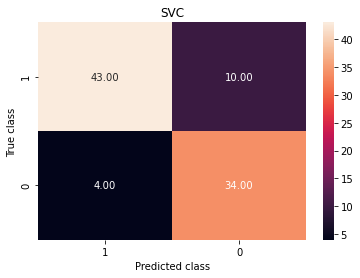

In [154]:
sfs_1=sfs_features(svm,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = print_fitures(sfs_1)

X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)

prdict_data(svm,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')
print(classification_report(y_test, svm.predict(X_test_sfs)))
conf(svm,X_test_sfs, y_test)

C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\abhil\anaconda3\envs\KerasPython37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


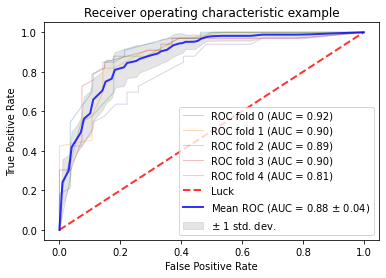

In [155]:
roc_graph_cv(svm,X[:,selectedFeatures],y)

### Table Reasults

In [156]:
# print (results_test)

df_test =pd.DataFrame(list(results_test.items()),
                      columns=['algo_name','acc_test'])
df_train =pd.DataFrame(list(results_train.items()),
                      columns=['algo_name','acc_train'])
df_results = df_test.join(df_train.set_index('algo_name'), on='algo_name')
df_results.sort_values('acc_test',ascending=False)

,algo_name,acc_test,acc_train
2,RandomForestClassifier_,84.62,100.00
14,SVC_sfs,84.62,87.74
3,RandomForestClassifier_FS,83.52,95.28
1,LinearDiscriminantAnalysis_sfs,82.42,83.96
4,RandomForestClassifier_sfs,82.42,86.32
7,GradientBoostingClassifier_,81.32,100.00
11,SVC_linear,81.32,85.38
0,LinearDiscriminantAnalysis_,80.22,85.38
6,DecisionTreeClassifier_sfs,78.02,86.79
8,GradientBoostingClassifier_sfs,78.02,86.79
